# Collatz Conjecture

The Collatz Conjecture is a mathematical problem that has puzzled mathematicians for decades. The conjecture is as follows:

1. Take any positive integer n. If n is even, divide it by 2 to get n / 2. If n is odd, multiply it by 3 and add 1 to obtain 3n + 1.
2. Repeat the process indefinitely. The conjecture states that no matter which number you start with, you will always eventually reach 1.


In [1]:
from functools import lru_cache

@lru_cache(maxsize=None)
def collatz(n):
    if n <= 1: return [1]
    if n % 2 == 0: return [n] + collatz(n // 2)
    return [n] + collatz(3 * n + 1)

## Graphing the Collatz Conjecture

In [2]:
from tqdm import tqdm

N = 10 ** 6
for i in tqdm(range(1, N)): collatz(i)

100%|██████████| 999999/999999 [00:09<00:00, 107966.33it/s]


In [9]:
SCOPE = 10 ** 3

### Lengths of the Collatz sequences

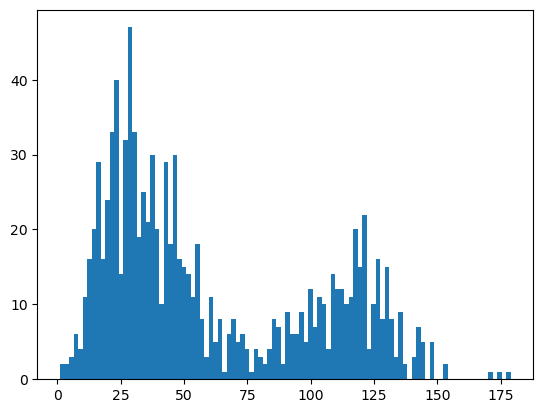

In [10]:
import matplotlib.pyplot as plt

plt.hist([len(collatz(i)) for i in range(1, SCOPE)], bins=100)
plt.show()

### Paths of the Collatz sequences

100%|██████████| 999/999 [00:02<00:00, 438.87it/s] 


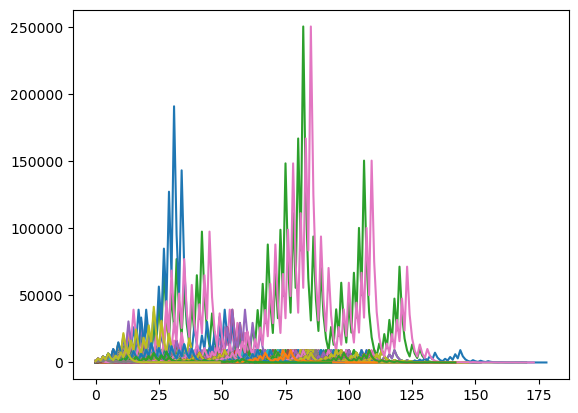

In [13]:
import matplotlib.pyplot as plt
from tqdm import tqdm

for i in tqdm(range(1, SCOPE)):
    plt.plot(collatz(i))
plt.show()

### Sum Up the Paths

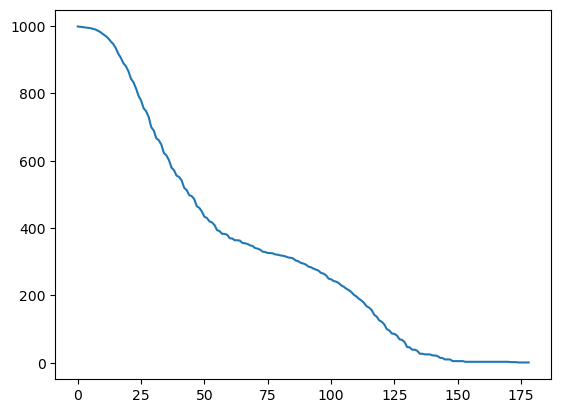

In [17]:
import matplotlib.pyplot as plt
n = len(max([collatz(i) for i in range(1, SCOPE)], key=len))
dp = [0] * n
for i in range(1, SCOPE):
    for j in range(len(collatz(i))):
        dp[j] += 1
plt.plot(dp)
plt.show()